In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Churn_Modelling (3).csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)

In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df1 = pd.get_dummies(df['Geography'],prefix='Geography',dtype = int)
df1


,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [9]:
df2 = pd.concat([df,df1],axis = 1)
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [10]:
df2['Gender'].replace({'Male':1,"Female":2},inplace = True)

In [11]:
df = df2.drop("Geography",axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  int32  
 11  Geography_Germany  10000 non-null  int32  
 12  Geography_Spain    10000 non-null  int32  
dtypes: float64(2), int32(3), int64(8)
memory usage: 898.6 KB


In [33]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [13]:
x = df.drop("Exited",axis = 1)
y = df['Exited']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 64)



In [14]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred_train = log_reg.predict(x_train)
accuracy = accuracy_score(y_train,y_pred_train)
print("Training Accuracy:",accuracy)
print("*"*80)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf_matrix)
print("*"*80)
Clf_report = classification_report(y_train,y_pred_train)
print("classification report :\n",Clf_report)
print("*"*80)


Training Accuracy: 0.78925
********************************************************************************
confusion matrix :
 [[6220  135]
 [1551   94]]
********************************************************************************
classification report :
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      6355
           1       0.41      0.06      0.10      1645

    accuracy                           0.79      8000
   macro avg       0.61      0.52      0.49      8000
weighted avg       0.72      0.79      0.72      8000

********************************************************************************


In [16]:
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Training Accuracy:",accuracy)
print("*"*80)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf_matrix)
print("*"*80)
Clf_report = classification_report(y_test,y_pred)
print("classification report :\n",Clf_report)
print("*"*80)

Training Accuracy: 0.806
********************************************************************************
confusion matrix :
 [[1593   15]
 [ 373   19]]
********************************************************************************
classification report :
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1608
           1       0.56      0.05      0.09       392

    accuracy                           0.81      2000
   macro avg       0.68      0.52      0.49      2000
weighted avg       0.76      0.81      0.73      2000

********************************************************************************


In [17]:
knn_clf = KNeighborsClassifier(n_neighbors=30)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [18]:
y_pred_train = knn_clf.predict(x_train)
accuracy = accuracy_score(y_train,y_pred_train)
print("Training Accuracy:",accuracy)
print("*"*80)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf_matrix)
print("*"*80)
Clf_report = classification_report(y_train,y_pred_train)
print("classification report :\n",Clf_report)
print("*"*80)

Training Accuracy: 0.794375
********************************************************************************
confusion matrix :
 [[6355    0]
 [1645    0]]
********************************************************************************
classification report :
               precision    recall  f1-score   support

           0       0.79      1.00      0.89      6355
           1       0.00      0.00      0.00      1645

    accuracy                           0.79      8000
   macro avg       0.40      0.50      0.44      8000
weighted avg       0.63      0.79      0.70      8000

********************************************************************************


In [19]:

y_pred = knn_clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Training Accuracy:",accuracy)
print("*"*80)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf_matrix)
print("*"*80)
Clf_report = classification_report(y_test,y_pred)
print("classification report :\n",Clf_report)
print("*"*80)

Training Accuracy: 0.804
********************************************************************************
confusion matrix :
 [[1608    0]
 [ 392    0]]
********************************************************************************
classification report :
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1608
           1       0.00      0.00      0.00       392

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

********************************************************************************


In [20]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred_train = dt_clf.predict(x_train)
accuracy = accuracy_score(y_train,y_pred_train)
print("Training Accuracy:",accuracy)
print("*"*80)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf_matrix)
print("*"*80)
Clf_report = classification_report(y_train,y_pred_train)
print("classification report :\n",Clf_report)
print("*"*80)

Training Accuracy: 1.0
********************************************************************************
confusion matrix :
 [[6355    0]
 [   0 1645]]
********************************************************************************
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6355
           1       1.00      1.00      1.00      1645

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

********************************************************************************


In [22]:
y_pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Training Accuracy:",accuracy)
print("*"*80)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf_matrix)
print("*"*80)
Clf_report = classification_report(y_test,y_pred)
print("classification report :\n",Clf_report)
print("*"*80)

Training Accuracy: 0.7945
********************************************************************************
confusion matrix :
 [[1377  231]
 [ 180  212]]
********************************************************************************
classification report :
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1608
           1       0.48      0.54      0.51       392

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.79      0.80      2000

********************************************************************************


In [23]:
dt_clf.feature_importances_

array([0.13417928, 0.02191251, 0.23977571, 0.07373272, 0.13491098,
       0.11544682, 0.01960601, 0.05867537, 0.16210328, 0.01225615,
       0.01934222, 0.00805896])

<Axes: >

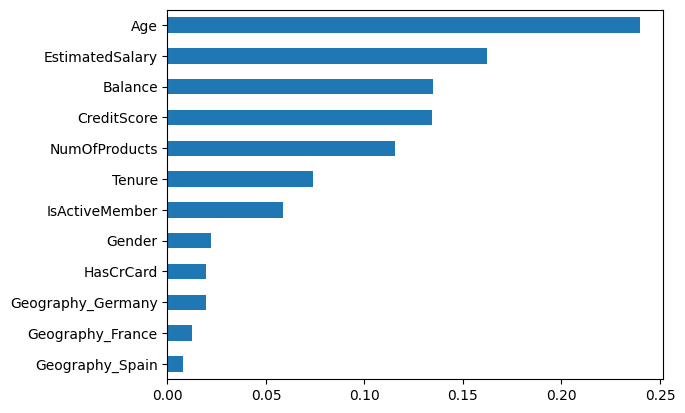

In [24]:
s1 = pd.Series(dt_clf.feature_importances_, index = x.columns)
s1.sort_values().plot(kind = "barh")

In [25]:
#Hyperperameter tunnning

Hyperperameter **tunning** **bold text**

In [26]:
dt_model = DecisionTreeClassifier(random_state = 1)

hyp_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(5,10),
            'min_samples_split':range(10,15),
            "min_samples_leaf": range(3,8)}

gscv_dt_model = GridSearchCV(dt_model,param_grid = hyp_grid,cv = 5,n_jobs = -1)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(10, 15)})

In [27]:
dt_clf = gscv_dt_model.best_estimator_
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=10,
                       random_state=1)

In [28]:
y_pred_train = dt_clf.predict(x_train)
accuracy = accuracy_score(y_train,y_pred_train)
print("Training Accuracy:",accuracy)
print("*"*80)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf_matrix)
print("*"*80)
Clf_report = classification_report(y_train,y_pred_train)
print("classification report :\n",Clf_report)
print("*"*80)

Training Accuracy: 0.87
********************************************************************************
confusion matrix :
 [[6169  186]
 [ 854  791]]
********************************************************************************
classification report :
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      6355
           1       0.81      0.48      0.60      1645

    accuracy                           0.87      8000
   macro avg       0.84      0.73      0.76      8000
weighted avg       0.86      0.87      0.86      8000

********************************************************************************


In [29]:
y_pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Training Accuracy:",accuracy)
print("*"*80)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf_matrix)
print("*"*80)
Clf_report = classification_report(y_test,y_pred)
print("classification report :\n",Clf_report)
print("*"*80)

Training Accuracy: 0.8575
********************************************************************************
confusion matrix :
 [[1552   56]
 [ 229  163]]
********************************************************************************
classification report :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1608
           1       0.74      0.42      0.53       392

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000

********************************************************************************


In [30]:
pickle.dump(dt_clf,open('dt_clf.pkl','wb'))

In [31]:
dt_clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=20, min_samples_leaf=5 ,random_state=1)
dt_clf.fit(x_train, y_train)
print('Train Accuracy :',dt_clf.score(x_train, y_train))
print("Test Accuracy  :",dt_clf.score(x_test, y_test))
plt.figure(figsize = (100,90))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('DT_clf_test.png')

Train Accuracy : 0.901875
Test Accuracy  : 0.824


In [32]:
with open("Chunk.pkl",'wb') as f:
    pickle.dump(dt_clf,f)

<Axes: >

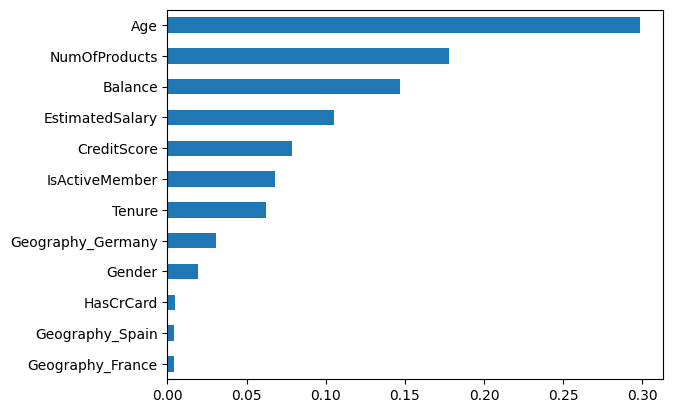

In [32]:
s1 = pd.Series(dt_clf.feature_importances_, index = x.columns)
s1.sort_values().plot(kind = "barh")

In [33]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
y_pred_train = rf_clf.predict(x_train)
accuracy = accuracy_score(y_train,y_pred_train)
print("Training Accuracy:",accuracy)
print("*"*80)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix :\n",cnf_matrix)
print("*"*80)
Clf_report = classification_report(y_train,y_pred_train)
print("classification report :\n",Clf_report)
print("*"*80)

Training Accuracy: 1.0
********************************************************************************
confusion matrix :
 [[6355    0]
 [   0 1645]]
********************************************************************************
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6355
           1       1.00      1.00      1.00      1645

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

********************************************************************************


In [35]:
y_pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Training Accuracy:",accuracy)
print("*"*80)
cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix :\n",cnf_matrix)
print("*"*80)
Clf_report = classification_report(y_test,y_pred)
print("classification report :\n",Clf_report)
print("*"*80)

Training Accuracy: 0.859
********************************************************************************
confusion matrix :
 [[1554   54]
 [ 228  164]]
********************************************************************************
classification report :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1608
           1       0.75      0.42      0.54       392

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000

********************************************************************************


In [ ]:
dt_model = RandomForestClassifier(random_state = 1)

hyp_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(5,10),
            'min_samples_split':range(10,15),
            "min_samples_leaf": range(3,8)}

gscv_dt_model = GridSearchCV(dt_model,param_grid = hyp_grid,cv = 5,n_jobs = -1)
gscv_dt_model.fit(x_train,y_train)